<a href="https://colab.research.google.com/github/secoxx/CS464/blob/main/Vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
import numpy as np
import math as math
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from google.colab import drive
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.svm import SVC


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


PRE-PROCESSING


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Reviews.csv')
data = data[:int(0.1 * len(data))]
data = data[data['Score'] != 3]
data['Sentiment'] = data['Score'].map({1: 'negative', 2: 'negative', 4: 'positive', 5: 'positive'})
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_review(review):
  review = review.translate(str.maketrans('', '', string.punctuation))
  review = review.lower()
  words = word_tokenize(review)
  words = [word for word in words if word not in stop_words]
  words = [lemmatizer.lemmatize(word) for word in words]
  review = ' '.join(words)
  return review

data['Text'] = data['Text'].apply(preprocess_review)
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,positive
...,...,...,...,...,...,...,...,...,...,...,...
56840,56841,B000GG0BNO,A2GTMNIXL0MDMC,Kristine Johanek,0,0,5,1318464000,Delicious tea,mango green tea daughter favorite tea availabl...,positive
56841,56842,B000GG0BNO,A70CKQ0ZITPIC,Cbeee,0,0,5,1315958400,I absolutely love this tea,current favorite tea add stevia sweeten bring ...,positive
56842,56843,B000GG0BNO,A1IN8OWQ76JMQR,Mary Ferjan,0,0,5,1299369600,"Best Mango tea I have tasted, smooth green tea",far best mango flavored tea tried bonus green ...,positive
56843,56844,B000C4MU9I,A1ZD3RIYJIBYLN,Sunny in the Northwest,9,9,5,1189468800,Good chocolate.,chocolate flavor shine bittersweet chocolate c...,positive


SPLITTING

In [ ]:
data_train, data_test = train_test_split(
    data, test_size=0.2, random_state=42)
data_val, data_test = train_test_split(
    data_test, test_size=0.5, random_state=42)

print(f"Training set size: {len(data_train)}")
print(f"Validation set size: {len(data_val)}")
print(f"Test set size: {len(data_test)}")

Training set size: 41868
Validation set size: 5233
Test set size: 5234


VECTORIZATION (Bag of Words Approach)

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(data_train["Text"])
train_vectors = vectorizer.transform(data_train["Text"])
val_vectors = vectorizer.transform(data_val["Text"])
test_vectors = vectorizer.transform(data_test["Text"])



In [ ]:
train_labels = data_train['Sentiment']
val_labels = data_val['Sentiment']
test_labels = data_test['Sentiment']

FITTING THE MODEL

Accuracy on test set: 0.904
Precision: 0.9156163212988677
Recall: 0.975643068518097
F1-score: 0.9446770994048932


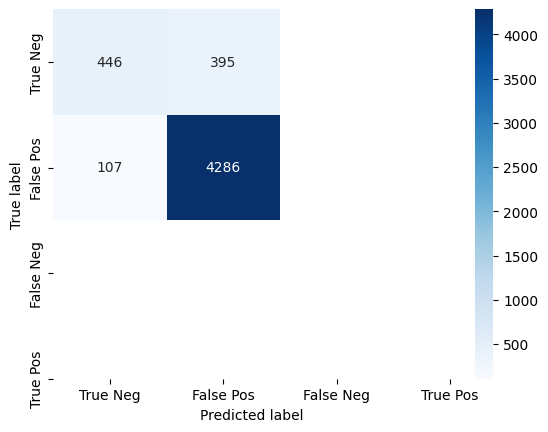

In [ ]:
clf = MultinomialNB()
clf.fit(train_vectors, train_labels)
test_pred = clf.predict(test_vectors)
accuracy = (test_pred == test_labels).mean()
precision = precision_score(test_labels, test_pred, pos_label='positive')
recall = recall_score(test_labels, test_pred, pos_label='positive')
f1 = f1_score(test_labels, test_pred, pos_label='positive')

print(f"Accuracy on test set: {accuracy:.3f}")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


cm = confusion_matrix(test_labels, test_pred)
labels = ["True Neg", "False Pos", "False Neg", "True Pos"]
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

Accuracy on test set: 0.918
Precision: 0.940457676071984
Recall: 0.9635784202139768
F1-score: 0.9518776703395547


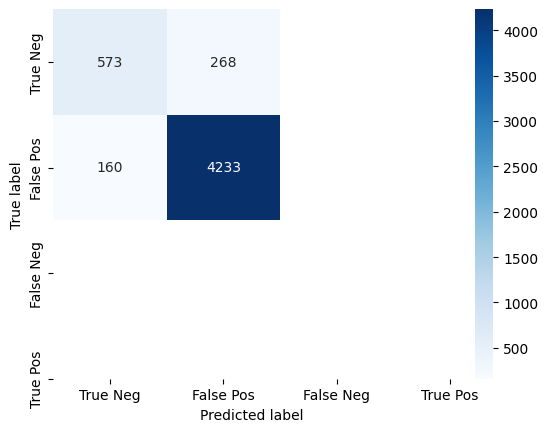

In [ ]:
clf = LogisticRegression(max_iter=5000) # You can set other hyperparameters as well
clf.fit(train_vectors, train_labels)
test_pred = clf.predict(test_vectors)
accuracy = (test_pred == test_labels).mean()
precision = precision_score(test_labels, test_pred, pos_label='positive')
recall = recall_score(test_labels, test_pred, pos_label='positive')
f1 = f1_score(test_labels, test_pred, pos_label='positive')

print(f"Accuracy on test set: {accuracy:.3f}")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

cm = confusion_matrix(test_labels, test_pred)
labels = ["True Neg", "False Pos", "False Neg", "True Pos"]
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


Sentence Embeddings

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    input_ids = tokenizer.encode(text, add_special_tokens=True, return_tensors='pt', truncation=True, max_length=512)
    with torch.no_grad():
      output = model(input_ids)
    embeddings = output.pooler_output.cpu().numpy()
    return embeddings

data['embedding'] = data['Text'].apply(get_bert_embedding)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_embeddings = np.vstack(train_data['embedding'].to_numpy())
train_labels = train_data['Sentiment'].to_numpy()
test_embeddings = np.vstack(test_data['embedding'].to_numpy())
test_labels = test_data['Sentiment'].to_numpy()

svm_model = SVC(kernel='linear')
svm_model.fit(train_embeddings, train_labels)

# Evaluate SVM model on testing data
accuracy = svm_model.score(test_embeddings, test_labels)
precision = precision_score(test_labels, svm_model.predict(test_embeddings), average='macro')
recall = recall_score(test_labels, svm_model.predict(test_embeddings), average='macro')
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
clf = LogisticRegression(max_iter=5000) # You can set other hyperparameters as well
clf.fit(train_embeddings, train_labels)
test_pred = clf.predict(test_vectors)
accuracy = (test_pred == test_labels).mean()
precision = precision_score(test_labels, test_pred, pos_label='positive')
recall = recall_score(test_labels, test_pred, pos_label='positive')
f1 = f1_score(test_labels, test_pred, pos_label='positive')

print(f"Accuracy on test set: {accuracy:.3f}")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

NameError: ignored